1. Load the log file provided into a Pandas Time series.   Almost every line in this file begins with a timestamp, but a couple don't, so you'll have to figure out how to deal with that.  The data in your series should be the string following, but not including, the [XXXX.YYYY] portion, which describes various things happening.

2. Are all the timestamps unique?  What's the resolution of each timestamp?

3. How many "Initializing Daemon" events are there?  How many "Installing new Application" events?

4. What are the earliest and latest timestamps in this log?  How many days does that period represent?

5. Group all the events by the hour of each day and count the events in each hour - make a bar plot with 24 bars representing these counts.

6. Do the same thing with days of the week (so now you'll have 7 bars) - note that the book doesn't say how to do this, so you'll have to poke around a bit.

7. Roughly how often does this daemon get initialized?  

In [55]:
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [56]:
#after testing replace StringIO(temp) to filename
log_file = "OneDriveStandaloneUpdaterDaemon.log"
#df = pd.read_csv(filename.log(temp), sep="\s*\[", names=['Level','Time','Text'], engine='python')
names = []
with open(log_file, newline='') as log:
    reader = csv.reader(log)
    for row in reader:
        names.append(row[0].split(' '))

[i.pop(2) for i in names]
print(names)

[['2020-02-06', '17:52:36.219', 'Initializing', 'Daemon'], ['2020-02-06', '17:52:36.221', 'Validating', 'connection'], ['2020-02-06', '17:52:36.223', 'Got', 'Attributes'], ['2020-02-06', '17:52:36.223', 'identifier', '"com.microsoft.OneDriveStandaloneUpdater"and', 'anchor', 'apple', 'generic', 'and', 'certificate', '1[field.1.2.840.113635.100.6.2.6]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[field.1.2.840.113635.100.6.1.13]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[subject.OU]', '=', 'UBF8T346G9'], ['2020-02-06', '17:52:36.228', 'Got', 'requirement'], ['2020-02-06', '17:52:36.282', 'Got', 'validated'], ['2020-02-06', '17:52:36.284', 'Got', 'Attributes'], ['2020-02-06', '17:52:36.284', 'identifier', '"com.microsoft.OneDriveStandaloneUpdater"and', 'anchor', 'apple', 'generic', 'and', 'certificate', '1[field.1.2.840.113635.100.6.2.6]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[field.1.2.840.113635.100.6.1.13]', '/*', 'exists', '*/', 'and', 'certificate', 'leaf[s

In [57]:
df = pd.DataFrame(names)

df = df.applymap(lambda s: s.lower() if type(s) == str else s)

columns = ['date', 'time', 'first_word', 'second_word', 'third_word']
for i in df.columns[5:]:
    columns.append("column_" + str(i))
columns

df.columns = columns
df.fillna("",inplace=True)
df['full_word'] = (df['first_word'] + ' ' + df['second_word'] + ' ' + df['third_word'])
df['timestamp'] = (df['date'] + ' ' + df['time'])
df.insert(5, 'full_word', df.pop('full_word'))
df.insert(2, 'timestamp', df.pop('timestamp'))

df.head()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,


In [58]:
df.describe()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
count,6747,6747,6747,6747,6747,6747,6747,6747,6747,6747,...,6747,6747,6747,6747,6747,6747,6747,6747,6747,6747
unique,447,4026,4026,13,14,30,40,5,5,4,...,2,2,2,2,2,2,2,2,2,2
top,2021-07-28,07:11:32.150,2021-06-12 16:00:03.023,got,requirement,,got requirement,,,,...,,,,,,,,,,
freq,69,4,4,4296,1432,4838,1432,4938,4963,4989,...,5315,5315,5315,5315,5315,5315,5315,5315,5315,5315


In [59]:
# date = df['timestamp']
# datem = datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f")
# datem

#[datetime.strptime(i, "%Y-%m-%d %H:%M:%S.%f") for i in df['timestamp']]

In [60]:
# df['timestamp'].resolution = timedelta(2021-4-27)
# df['timestamp'].resolution

In [61]:
# Removing whitespace from whole dataframe, copied directly from https://www.geeksforgeeks.org/pandas-
# strip-whitespace-from-entire-dataframe/#:~:text=str.,or%20index%20of%20an%20object.

def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':   
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:  
            # if condn. is False then it will do nothing.
            pass

# applying whitespace_remover function on dataframe
whitespace_remover(df)
 
# printing dataframe
df.head()

,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,


In [62]:
# 2. Are all the timestamps unique?  What's the resolution of each timestamp?

# Not all timestamps are unique
df['timestamp'].is_unique

date_time = []
df2 = df[(df['timestamp'] != 'no process')]

# Code to find resolution of each timestamp
res = []
for i in df2['timestamp']:
    res.append(i)

def time_res(resolution):
    for i in resolution:
        if (len(resolution) == 1):
            return "decisecond"
        elif (len(resolution) == 2):
            return "centisecond"
        elif (len(resolution) == 3):
            return "millisecond"
        elif (len(resolution) > 3) and (len(resolution) <= 6):
            return "microsecond"
        elif (len(resolution) > 6) and (len(resolution) <= 9):
            return "nanosecond"
        else:
            return "Larger than nanosecond"

resolutions = []
for val in res:
    res_split = val.split(".")
    #print(res_split[1])
    rval = time_res(res_split[1])
    resolutions.append(rval)
resolutions

#dfmi.loc[:, 
df2["resolutions"] = resolutions
df2.head()

<ipython-input-62-25e0e50d780b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["resolutions"] = resolutions


,date,time,timestamp,first_word,second_word,third_word,full_word,column_5,column_6,column_7,...,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,resolutions
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,initializing,daemon,,initializing daemon,,,,...,,,,,,,,,,millisecond
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,validating,connection,,validating connection,,,,...,,,,,,,,,,millisecond
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,got,attributes,,got attributes,,,,...,,,,,,,,,,millisecond
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,and,...,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9,millisecond
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,got,requirement,,got requirement,,,,...,,,,,,,,,,millisecond


In [63]:
# 3. How many "Initializing Daemon" events are there?  How many "Installing new Application" events?

# Finds how many "Initializing Daemon" events there are
intializing_daemon_events = df[df['full_word'] == 'initializing daemon']
print("There are " + str(len(intializing_daemon_events)) + " Initializing Daemon events")

# Finds how many "Installing new Application" events there are
installing_application_events = df[(df['full_word'] == 'installing new application') | (df['full_word'] == 'installed new application')]
print("There are " + str(len(installing_application_events)) + " Installing new Application events")

There are 57 Initializing Daemon events
There are 50 Installing new Application events


In [64]:
# 4. What are the earliest and latest timestamps in this log?  How many days does that period represent?

df2 = df[df.timestamp != 'no process']
min_time_stamp = min(df2['timestamp'])
print('The earliest timestamp in this log is ' + min_time_stamp)
max_time_stamp = max(df2['timestamp'])
print('The latest timestamp in this log is ' + max_time_stamp)

# part 2: how many days are between february 6 2020 and april 13 2022
earliest = datetime(2020, 2, 6, 17, 52, 36)
latest = datetime(2022, 4, 13, 1, 29, 51)

c = latest - earliest
print('The difference between these two timestamps is ' + str(c))

The earliest timestamp in this log is 2020-02-06 17:52:36.219
The latest timestamp in this log is 2022-04-13 01:29:51.976
The difference between these two timestamps is 796 days, 7:37:15


In [65]:
# 5. Group all the events by the hour of each day and count the events in each hour - 
# - make a bar plot with 24 bars representing these counts.

hour = []
for i in df2['time']:
    time = i.split(":")
    hour.append(time[0])
hour

df2['hour'] = hour

df2.insert(3, 'hour', df2.pop('hour'))
df2.head()

<ipython-input-65-a5c83b21c0ad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour'] = hour


,date,time,timestamp,hour,first_word,second_word,third_word,full_word,column_5,column_6,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,17,initializing,daemon,,initializing daemon,,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,17,validating,connection,,validating connection,,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,17,got,attributes,,got attributes,,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,17,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,generic,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,17,got,requirement,,got requirement,,,...,,,,,,,,,,


In [66]:
# Group data by the hour of each day
group = df2.groupby(by = ["hour"])
count_ser = group.hour.count()

# Get a dataframe with every hour (0-23) and the total number of events for each hour 
hourly_events = pd.DataFrame(data = {"events_per_hour": count_ser}).reset_index(level = ['hour'])
hourly_events

,hour,events_per_hour
0,00,100
1,01,191
2,02,112
3,03,57
4,04,141
5,05,140
6,06,56
7,07,183
8,08,183
9,09,428


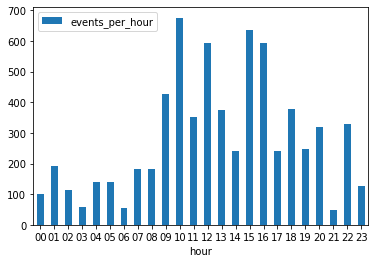

In [67]:
bar_plot_with_counts = hourly_events.plot.bar(x = 'hour', y='events_per_hour', rot = 0)
bar_plot_with_counts
plt.show()

In [68]:
# 6. Do the same thing with days of the week (so now you'll have 7 bars) -
# - note that the book doesn't say how to do this, so you'll have to poke around a bit.

day = []
for i in df2['date']:
    time = i.split("-")
    day.append(time[2])
day

df2['day'] = day

df2.insert(3, 'day', df2.pop('day'))
df2.head()

<ipython-input-68-c75d041de474>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = day


,date,time,timestamp,day,hour,first_word,second_word,third_word,full_word,column_5,...,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23
0,2020-02-06,17:52:36.219,2020-02-06 17:52:36.219,06,17,initializing,daemon,,initializing daemon,,...,,,,,,,,,,
1,2020-02-06,17:52:36.221,2020-02-06 17:52:36.221,06,17,validating,connection,,validating connection,,...,,,,,,,,,,
2,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,06,17,got,attributes,,got attributes,,...,,,,,,,,,,
3,2020-02-06,17:52:36.223,2020-02-06 17:52:36.223,06,17,identifier,"""com.microsoft.onedrivestandaloneupdater""and",anchor,"identifier ""com.microsoft.onedrivestandaloneup...",apple,...,certificate,leaf[field.1.2.840.113635.100.6.1.13],/*,exists,*/,and,certificate,leaf[subject.ou],=,ubf8t346g9
4,2020-02-06,17:52:36.228,2020-02-06 17:52:36.228,06,17,got,requirement,,got requirement,,...,,,,,,,,,,


In [69]:
#6 continuation

# Group data by the days of the week
group = df2.groupby(by = ["day"])
count_ser = group.day.count()

# Get a dataframe with every hour (0-23) and the total number of events for each hour 
daily_events = pd.DataFrame(data = {"events_per_day": count_ser}).reset_index(level = ['day'])
days_of_week = [0, 1, 2, 3, 4, 5, 6]
weekly = dict.fromkeys(days_of_week, 0)
daily_events['day'] = daily_events['day'].astype(int)

for row in range(len(daily_events['day'])):
    if row % 7 == 0:
        weekly[0] += daily_events['events_per_day'][row]
    if row % 7 == 1:
        weekly[1] += daily_events['events_per_day'][row]
    if row % 7 == 2:
        weekly[2] += daily_events['events_per_day'][row]
    if row % 7 == 3:
        weekly[3] += daily_events['events_per_day'][row]
    if row % 7 == 4:
        weekly[4] += daily_events['events_per_day'][row]
    if row % 7 == 5:
        weekly[5] += daily_events['events_per_day'][row]
    if row % 7 == 6:
        weekly[6] += daily_events['events_per_day'][row]
print(weekly)

{0: 1004, 1: 1126, 2: 913, 3: 924, 4: 904, 5: 886, 6: 988}


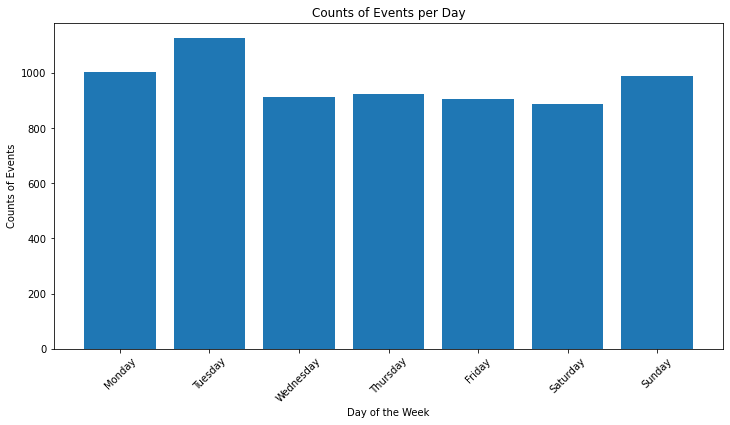

In [70]:
# day 0 represents Monday, day 1 represents Tuesday, etc.
fig = plt.figure(figsize =(12, 6))

plt.bar(weekly.keys(), weekly.values())
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Counts of Events')
plt.title('Counts of Events per Day')
plt.show()

<ipython-input-71-b0a2ccb5228d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['month'] = month
<ipython-input-71-b0a2ccb5228d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['month'] = df_daemon['month'].astype(int)


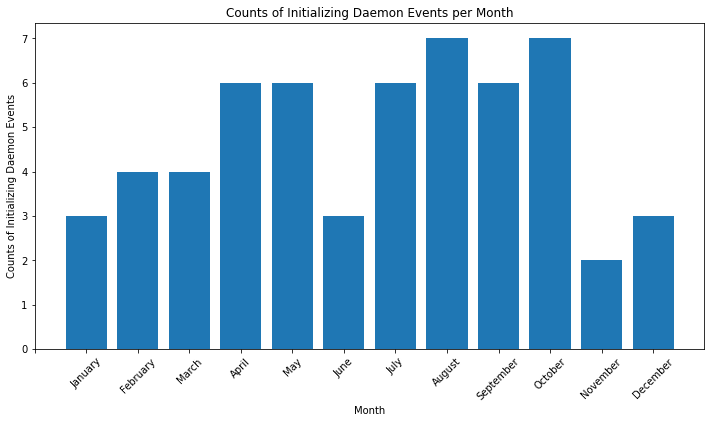

In [71]:
# 7. Roughly how often does this daemon get initialized per month, day, and year?

# Need to find the frequency of "initializing daemon" events per month

# create new dataframe that only contains initializing daemon events
df_daemon = df2[df2.full_word == 'initializing daemon']

month = []
# finding the month for each event
for i in df_daemon['date']:
    date = i.split("-")
    month.append(date[1])
month

df_daemon['month'] = month

# adding data to dataframe
df_daemon.insert(3, 'month', df_daemon.pop('month'))
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
monthly = dict.fromkeys(months, 0)

# adding up number of events for each month
df_daemon['month'] = df_daemon['month'].astype(int)
for month in df_daemon['month']:
    monthly[month] += 1 

fig = plt.figure(figsize =(12, 6))

# plot month vs. counts of events for those months
plt.bar(monthly.keys(), monthly.values())
plt.xticks(np.arange(13), ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Month')
plt.show()

<ipython-input-72-528d4c5cd406>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['day'] = days
<ipython-input-72-528d4c5cd406>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['day'] = df_daemon['day'].astype(int)


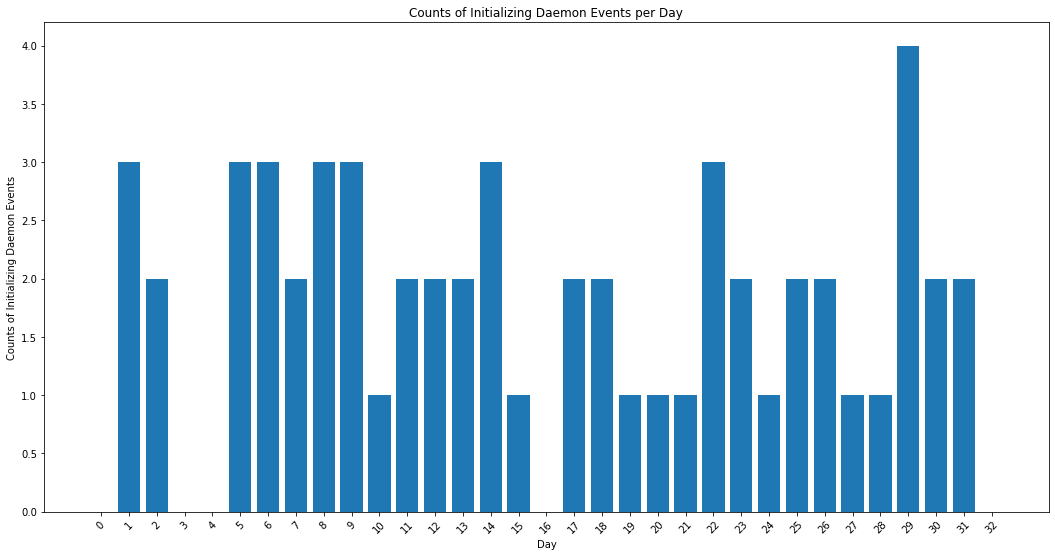

In [72]:
# show how many "initializing daemon" events happen on certain days throughout whole logfile

# find the day for each event using split method and indexing
days = []
for i in df_daemon['date']:
    date = i.split("-")
    days.append(date[2])
days

df_daemon['day'] = days

# insert column at specific location in dataframe
df_daemon.insert(3, 'day', df_daemon.pop('day'))

days_list = list(range(0,33))
daily = dict.fromkeys(days_list, 0)

# adding up number of events for each day into dictionary
df_daemon['day'] = df_daemon['day'].astype(int)

for day in df_daemon['day']:
    if day in days_list:
        daily[day] += 1 

fig = plt.figure(figsize =(18, 9))
# plot days vs. count of events for those days
plt.bar(daily.keys(), daily.values())
plt.xticks(np.arange(33), days_list)
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Day')
plt.show()

<ipython-input-73-1d55b3a653e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daemon['year'] = year


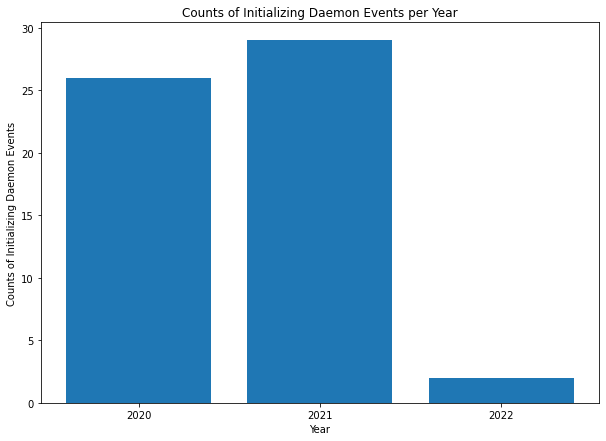

In [73]:
# frequency of initializing daemon events per year

# find what the year is for each event using split method and indexing
year = []
for i in df_daemon['date']:
    date = i.split("-")
    year.append(date[0])
year
df_daemon['year'] = year
# insert this data into dataframe
df_daemon.insert(3, 'year', df_daemon.pop('year'))
df_daemon.head()

# add up number of events for each year into a dictionary
years = ['2020', '2021', '2022']
yearly = dict.fromkeys(years, 0)

for year in df_daemon['year']:
    if year == '2020':
        yearly['2020'] += 1
    if year == '2021':
        yearly['2021'] += 1
    if year == '2022':
        yearly['2022'] += 1

fig = plt.figure(figsize =(10, 7))
# plot year vs. count of events for those years
plt.bar(yearly.keys(), yearly.values())
plt.xlabel('Year')
plt.ylabel('Counts of Initializing Daemon Events')
plt.title('Counts of Initializing Daemon Events per Year')
plt.show()